# importation des librairies et des fichiers csv

In [567]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) 

In [568]:
#importation des fichiers csv
new_customers = pd.read_csv("./donnees/new_customers.csv")

products = pd.read_csv("./donnees/new_products.csv")

new_transactions = pd.read_csv("./donnees/new_transactions.csv")

In [569]:
customers = pd.read_csv("./donnees/new_customers.csv")


In [570]:
#Fusion "new_transactions" et "products"

df = pd.merge(new_transactions, products, how="left", on="id_prod" )
df.info()
print(len(df["client_id"].unique()),"\n Il manque 221 valeurs dans les colonnes 'price' et ' categ' ")


<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     679332 non-null  object 
 1   date        679332 non-null  object 
 2   session_id  679332 non-null  object 
 3   client_id   679332 non-null  object 
 4   price       679111 non-null  float64
 5   categ       679111 non-null  float64
dtypes: float64(2), object(4)
memory usage: 36.3+ MB
8600 
 Il manque 221 valeurs dans les colonnes 'price' et ' categ' 


# Exploration des donées

On peut constater qu'il y a 8600 id-client uniques dans notre nouveau df alors que le df custommers de base contenait 8623 valeurs uniques.
Il y a donc 23 clients qui n'ont jamais rien acheté.  

Price et categ ont des lignes manquantes.


In [571]:
# changement formats des dates

df['date'] = pd.to_datetime(df['date'])
df['jour'] = df["date"].dt.day
df['mois'] = df["date"].dt.month
df['annee'] = df["date"].dt.year
df['annee/mois'] = df['date'].dt.strftime('%Y %m')
df["date"] = df['date'].dt.strftime('%d-%m-%Y')

df.shape

(679332, 10)

In [572]:
# Fusion "df" et "customers". 
df = pd.merge(df, customers, how="left", on="client_id")
df.head()


,id_prod,date,session_id,client_id,price,categ,jour,mois,annee,annee/mois,sex,birth,age
0,0_1518,20-05-2022,s_211425,c_103,4.18,0.0,20,5,2022,2022 05,f,1986,36
1,1_251,02-02-2022,s_158752,c_8534,15.99,1.0,2,2,2022,2022 02,m,1988,34
2,0_1277,18-06-2022,s_225667,c_6714,7.99,0.0,18,6,2022,2022 06,f,1968,54
3,2_209,24-06-2021,s_52962,c_6941,69.99,2.0,24,6,2021,2021 06,m,2000,22
4,0_1509,11-01-2023,s_325227,c_4232,4.99,0.0,11,1,2023,2023 01,m,1980,42


Apres la fusion avec les derniers fichiers on obtient un data frame complet

In [573]:
df.info()

#display(df[:100])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     679332 non-null  object 
 1   date        679332 non-null  object 
 2   session_id  679332 non-null  object 
 3   client_id   679332 non-null  object 
 4   price       679111 non-null  float64
 5   categ       679111 non-null  float64
 6   jour        679332 non-null  int64  
 7   mois        679332 non-null  int64  
 8   annee       679332 non-null  int64  
 9   annee/mois  679332 non-null  object 
 10  sex         679332 non-null  object 
 11  birth       679332 non-null  int64  
 12  age         679332 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 72.6+ MB


In [574]:
#les lignes ou il manque des valeurs "price" et "categ"

display(df.loc[df['price'].isna()][:10])
print(len(df.loc[df['price'].isna()]))

,id_prod,date,session_id,client_id,price,categ,jour,mois,annee,annee/mois,sex,birth,age
2633,0_2245,23-09-2022,s_272266,c_4746,NaN,NaN,23,9,2022,2022 09,m,1940,82
10103,0_2245,23-07-2022,s_242482,c_6713,NaN,NaN,23,7,2022,2022 07,f,1963,59
11723,0_2245,03-12-2022,s_306338,c_5108,NaN,NaN,3,12,2022,2022 12,m,1978,44
15670,0_2245,16-08-2021,s_76493,c_1391,NaN,NaN,16,8,2021,2021 08,m,1991,31
16372,0_2245,16-07-2022,s_239078,c_7954,NaN,NaN,16,7,2022,2022 07,m,1973,49
17392,0_2245,21-01-2023,s_330241,c_6268,NaN,NaN,21,1,2023,2023 01,m,1991,31
20519,0_2245,20-11-2022,s_300389,c_8524,NaN,NaN,20,11,2022,2022 11,f,1982,40
21337,0_2245,20-10-2021,s_107564,c_1746,NaN,NaN,20,10,2021,2021 10,m,1994,28
21706,0_2245,17-04-2021,s_21906,c_7808,NaN,NaN,17,4,2021,2021 04,m,1977,45
23840,0_2245,28-02-2022,s_172304,c_4964,NaN,NaN,28,2,2022,2022 02,f,1982,40


221


Les 221 valeurs manquantes correspondent au produit 0_2245 qui est donc un produit de la categorie 0.  

In [575]:
# Remplacer les valeurs manquantes pour le produit 0_2245 par la mediane des prix de categ 0 
mediane = df.loc[(df['categ']== 0),'price'].median()
df['categ'].fillna(0, inplace=True)
df['price'].fillna(mediane,inplace=True)
print(mediane)

df.info()


9.99
<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     679332 non-null  object 
 1   date        679332 non-null  object 
 2   session_id  679332 non-null  object 
 3   client_id   679332 non-null  object 
 4   price       679332 non-null  float64
 5   categ       679332 non-null  float64
 6   jour        679332 non-null  int64  
 7   mois        679332 non-null  int64  
 8   annee       679332 non-null  int64  
 9   annee/mois  679332 non-null  object 
 10  sex         679332 non-null  object 
 11  birth       679332 non-null  int64  
 12  age         679332 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 72.6+ MB


,annee/mois,vol_categ_0,vol_categ_1,vol_categ_2
0,2021 03,18140,9134,1336
1,2021 04,19356,7579,1522
2,2021 05,18509,8107,1677
3,2021 06,15905,9264,1688
4,2021 07,13582,9169,1991
5,2021 08,15737,7954,1968
6,2021 09,23154,9268,904
7,2021 10,18769,1666,1171
8,2021 11,14610,12316,1395
9,2021 12,19309,12259,896


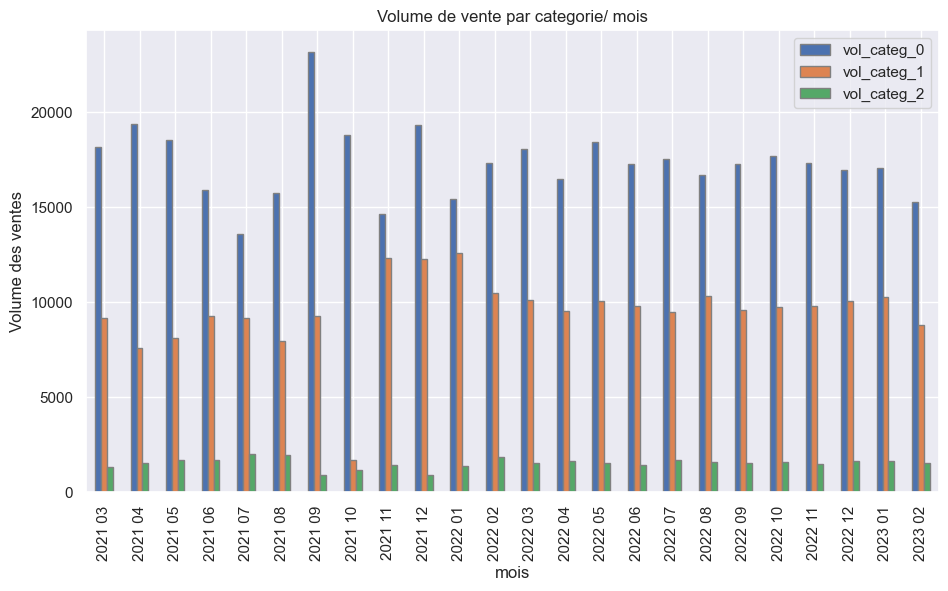

In [576]:
MensAg_df = df[["categ", "price", "annee/mois"]]
MensAg_df = pd.pivot_table(MensAg_df, index="annee/mois", columns=["categ"], aggfunc=["count"]).reset_index()
#print(MensAg_df)
MensAg_df.columns = ["annee/mois", "vol_categ_0", "vol_categ_1", "vol_categ_2"]
display(MensAg_df[:10])
MensAg_df.plot.bar(figsize=(11,6),x="annee/mois", edgecolor = "grey")

plt.ylabel('Volume des ventes')
plt.xlabel('mois')
plt.title("Volume de vente par categorie/ mois")
plt.show()

Lorsqu'on regarde un graphique des ventes par mois et par categorie, on constate  que chaque mois le volume des vente est toujours plus important pour la categorie 0.  
Puis la categorie 1 et enfin la categorie 2.  
On constate également que le volume des ventes de la categorie 1 semble avoir un problème.  
Il y a une très forte baisse du volume de vente en octobre 2021.

In [577]:
#afficher les ventes d'octobre par jour pour voir les erreurs.

df_oct = df.loc[(df["annee/mois"]== "2021 10")]
print(df_oct.shape)

df_oct = df_oct.groupby(['jour' , "categ"]).agg({"price":["sum","count"]}).reset_index()

df_oct_0= df_oct.loc[df_oct["categ"]==0]
df_oct_1= df_oct.loc[df_oct["categ"]==1]
df_oct_2= df_oct.loc[df_oct["categ"]==2]

print("le DF pour la cotegorie 0 de octobre 2021 comprends:",len(df_oct_0),'valeurs\n', 
"le DF pour la cotegorie 1 de octobre 2021 comprends:",len(df_oct_1),'valeurs\n',
"le DF pour la cotegorie 2 de octobre 2021 comprends:", len(df_oct_2),"valeurs\n")
print("On constate que le df de la categorie 1 ne comprends que 5 valeurs.")
display(df_oct_1)
print(df.shape)

(21606, 13)
le DF pour la cotegorie 0 de octobre 2021 comprends: 31 valeurs
 le DF pour la cotegorie 1 de octobre 2021 comprends: 5 valeurs
 le DF pour la cotegorie 2 de octobre 2021 comprends: 31 valeurs

On constate que le df de la categorie 1 ne comprends que 5 valeurs.


jour categ    price      
                   sum count
1     1   1.0  7003.79   344
56   28   1.0  6317.99   316
59   29   1.0  6425.18   326
62   30   1.0  6753.69   338
65   31   1.0  7261.67   342

(679332, 13)


On constate que dans le dataframe contenant les ventes de la categorie 1  le mois d'octobre 2021 n'a enregistrer aucune vente entre le 1er et le 28 octobre.    
Etant donne qu'il manque un grand nombre de valeurs pour octobre 2021, on supprime les donnees liées a ce mois car elles risquent d'influencer de futurs calculs.


In [578]:
# Supprimer les lignes d'octobre 2021
# il y a 21 606 lignes correspondant au mois d'octobre. 
df.drop(df[df["annee/mois"]== "2021 10"].index, inplace=True)

df.shape # les 21606 lignes correspondant a octobre 2021 ont bien été suprimées

(657726, 13)

# Analyse du chiffre d'affaires

## Analyse du chiffre d'affaires

In [579]:
# CA total sur l'enssemble des ventes

df_chiffre_affaire = df.groupby('annee/mois', as_index=False)["price"].sum()
df_chiffre_affaire.rename(columns={"price": "Ca par mois"}, inplace=True)
ca_tot= df_chiffre_affaire["Ca par mois"].sum()
print("Le chiffre d'affaires total est de :", round(ca_tot, 1))
#df_chiffre_affaire.head()


Le chiffre d'affaires total est de : 11535067.8


In [580]:
# CA Annuel 
df_ca_annee = df.groupby('annee', as_index=False)["price"].sum()
df_ca_annee.rename(columns={"price": "Ca par annee"}, inplace=True)
display(df_ca_annee)



,annee,Ca par annee
0,2021,4450827.02
1,2022,6109880.61
2,2023,974360.17


Text(0.5, 1.0, "Evolution mensuelle du chiffre d'affaires")

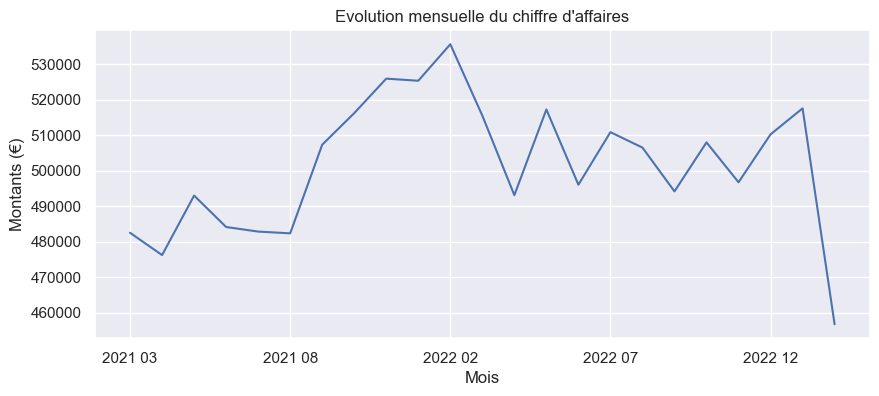

In [581]:
# CA Mensuel
df_ca_mensuel = df.groupby(["annee/mois"])["price"].sum()

#display(df_ca_mensuel)

# Affichage graphique du chiffre d'affaires mensuel
plt.figure(figsize=(10,4))
df_ca_mensuel.plot()

plt.xlabel("Mois")
plt.ylabel("Montants (€)")
plt.title("Evolution mensuelle du chiffre d'affaires")



,categ,price
0,0.0,4222618.00
1,1.0,4619960.37
2,2.0,2692489.43


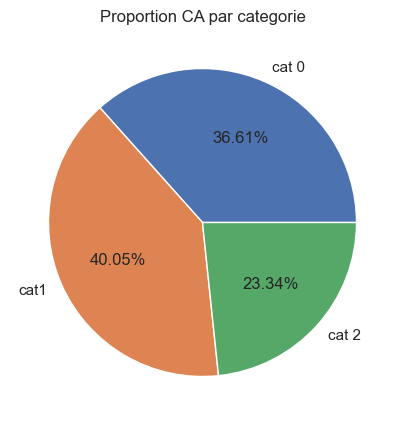

In [582]:
# Repartition du chiffre d'affaires par categorie
df_ca_categ = df.groupby('categ', as_index=False)['price'].sum()

display(df_ca_categ)

# Graphique
data= df_ca_categ["price"]
labels=["cat 0", "cat1", "cat 2"]
plt.pie(data, labels=labels ,autopct='%0.2f%%')
plt.title("Proportion CA par categorie")
plt.show()

## Moyenne mobile du Chiffre d'affaires

Text(0.5, 1.0, "Moyenne mobile du chiffre d'affaire")

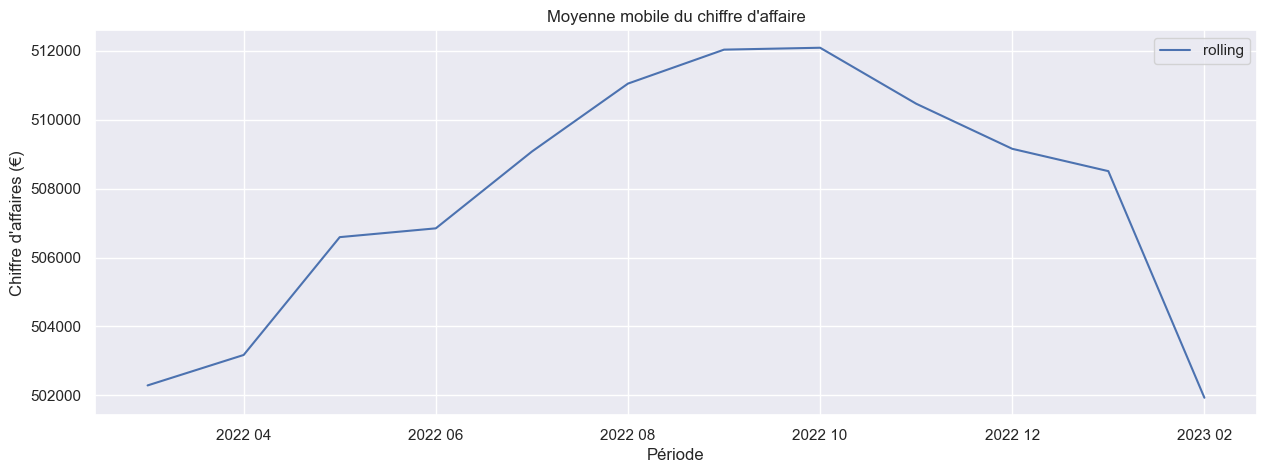

In [583]:
#print(df_chiffre_affaires)
df_moy_mob = df.groupby('annee/mois', as_index=False)["price"].sum()
df_moy_mob.rename(columns={"price": "Ca par mois"}, inplace=True)
df_moy_mob["rolling"] = df_moy_mob["Ca par mois"].rolling(12).mean()

# Grapgique moyenne mobile
df_moy_mob.plot(x='annee/mois', y ='rolling')

plt.xlabel("Période")
plt.ylabel("Chiffre d'affaires (€)")
plt.title("Moyenne mobile du chiffre d'affaire")

# Analyse sur les produits

### Repartition des prix par categorie

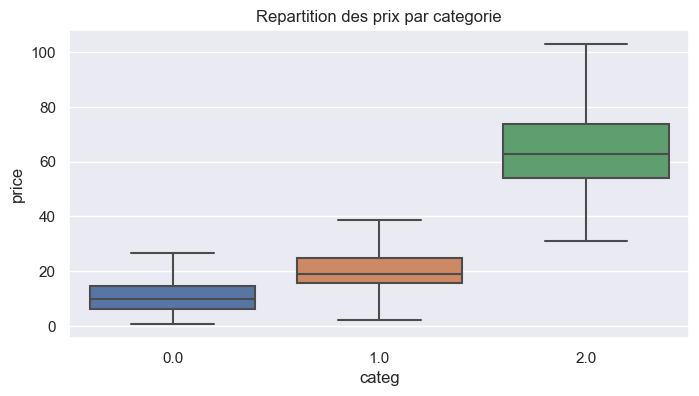

In [584]:
#df_price_categ = df.groupby(by=['categ'])["price"]
plt.figure(figsize=(8,4))
sns.boxplot(data=df , y='price', x='categ', showfliers=False)
plt.title('Repartition des prix par categorie')
plt.show()

### les tops et les flops

In [585]:
df_top = df.groupby(by=['id_prod'],as_index=False)["session_id"].count()
df_top= df_top.sort_values(by='session_id',ascending=False)
df_top.rename(columns={"session_id":"Nombre de vente"}, inplace=True)
display(df_top[:10])

,id_prod,Nombre de vente
2590,1_369,2237
2643,1_417,2173
2640,1_414,2166
2732,1_498,2117
2652,1_425,2084
2628,1_403,1950
2638,1_412,1938
2639,1_413,1931
2631,1_406,1931
2632,1_407,1923


In [586]:
df_flop = df.groupby(['id_prod'], as_index=False)['session_id'].count()
df_flop= df_flop.sort_values(by= 'session_id',ascending=True)
df_flop.rename(columns={"session_id":"Nombre de vente"}, inplace=True)
display(df_flop[:5])

,id_prod,Nombre de vente
2270,0_980,1
3174,2_23,1
588,0_1533,1
313,0_1284,1
2165,0_886,1


### Repartition C.A entre les produits

indice de Gini: 0.695


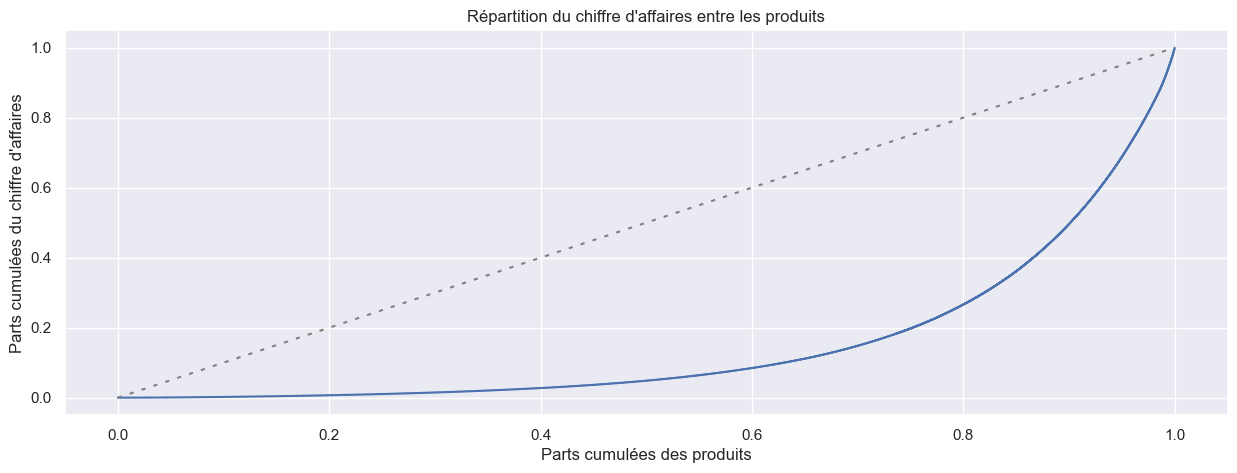

In [587]:

# Courbe de Lorentz: (Repartition du CA par produits)

lorenz_CA_prod = np.cumsum(np.sort(df_top["Nombre de vente"])) / df_top["Nombre de vente"].sum()
lorenz_CA_prod = np.append([0], lorenz_CA_prod)
n=len(lorenz_CA_prod)
xaxis = np.linspace(0-1/n,1+1/n,n+1)
plt.plot(np.linspace(0,1,n), lorenz_CA_prod, drawstyle='steps-post'),
plt.plot(np.linspace(0,1,n+1), np.linspace(0,1,n+1),color ="grey", dashes=[2,4])

plt.ylabel("Parts cumulées du chiffre d'affaires")
plt.xlabel("Parts cumulées des produits")
plt.title("Répartition du chiffre d'affaires entre les produits")
aire_ss_courbe_CA_prod = lorenz_CA_prod[:-1].sum() / len(lorenz_CA_prod)
S_ca_prod = 0.5 - aire_ss_courbe_CA_prod
gini_CA_prod = 2* S_ca_prod
print("indice de Gini:",round(gini_CA_prod,3))

L'indice de Gini s'éloigne fortement de 0, le poids des produits dans le chiffre d'affaires global est donc très inégal.

# Analyse des clients:

### Repartition du C.A entre les clients

Le chiffre d'affaires par client    client_id    price
0       c_1   550.19
1      c_10  1353.60
2     c_100   254.85


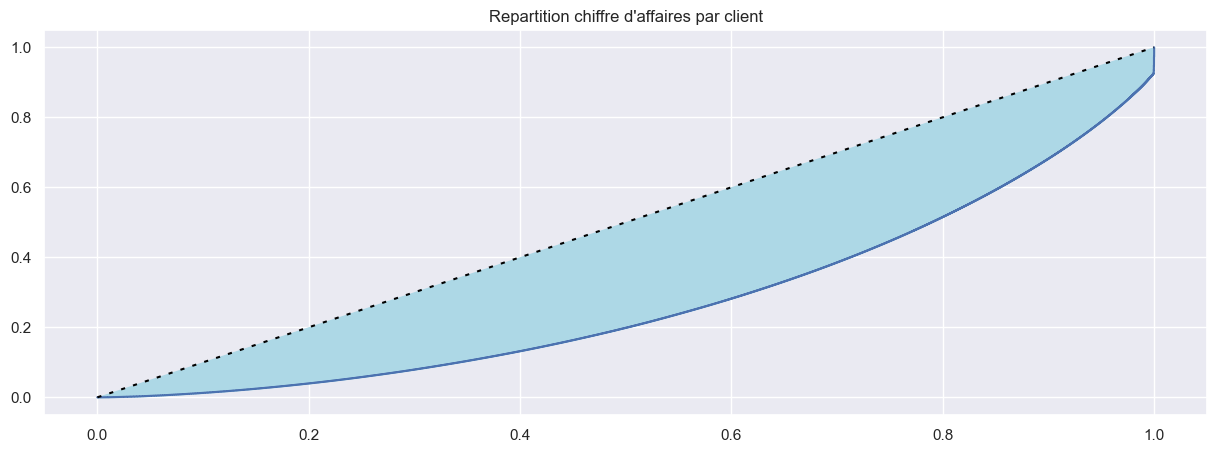

indice de Gini: 0.448


In [588]:
# Chiffre d'affaires par client
montant_achats_ca = df.groupby(["client_id"], as_index=False)["price"].sum()

print("Le chiffre d'affaires par client ", round(montant_achats_ca,2)[:3])
montant_achats_ca.rename(columns={"price":"ca"}, inplace=True)
ca= montant_achats_ca["ca"]

#courbe de Lorenz
n = len(ca)
lorenz = np.cumsum(np.sort(ca)) / ca.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

xaxis = np.linspace(0-1/n,1+1/n,n+1) 
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot(np.linspace(0,1,n+1), np.linspace(0,1,n+1), color ="black", dashes=[2,4])
plt.fill_between(xaxis, lorenz, np.linspace(0,1,n+1),color='lightblue')
plt.title("Repartition chiffre d'affaires par client")
plt.show()

#Calcul de l'indice de Gini
aire_ss_courbe_CA_client = lorenz[:-1].sum() / len(lorenz)
S_ca_client = 0.5 - aire_ss_courbe_CA_client
gini_CA_client = 2*S_ca_client
print("indice de Gini:",round(gini_CA_client,3))

L'indice de Gini se situe entre 0 et 1.  
0 Etant une egalite parfaite et 1 une situation la plus inégalitaire possible

## Analyse Top clients

In [589]:

# Meilleurs clients:

best_client_vol = df.groupby(["client_id"], as_index=False)["id_prod"].count()
best_client_vol = best_client_vol.rename(columns={"id_prod": "nombre de ventes"})
best_client_vol = best_client_vol.sort_values(by="nombre de ventes" ,ascending=False)

best_client_ca = df.groupby(["client_id"], as_index=False)["price"].sum()
best_client_ca = best_client_ca.rename(columns={"price": "CA par client"})
best_client_ca = best_client_ca.sort_values(by="CA par client" ,ascending=False)

print("Clients ayant le plus dépensé")
print(best_client_vol[:5],'\n', best_client_ca[:5])

Clients ayant le plus dépensé
     client_id  nombre de ventes
677     c_1609             24472
6336    c_6714              8903
2723    c_3454              6635
4387    c_4958              5090
2513    c_3263               392 
      client_id  CA par client
677     c_1609      312755.08
4387    c_4958      282654.61
6336    c_6714      149843.69
2723    c_3454      111796.68
2108    c_2899        5214.05


In [590]:
# 4 meilleurs clients par rapport au chiffre d'affaire total
id_best =['c_1609', 'c_4958', 'c_6714','c_3454']


In [591]:
# creation d'une colonne "particulier"/"pro" 
id_best =['c_1609', 'c_4958', 'c_6714','c_3454']

df['client_type'] = 'particulier'
df['client_type'].loc[(df["client_id"].isin(id_best))] = "pro"
df.shape



C:\Users\bahia\AppData\Local\Temp\ipykernel_25008\1684569762.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['client_type'].loc[(df["client_id"].isin(id_best))] = "pro"


(657726, 14)

In [592]:
# Creation d'un df pour les 4 clients
df_pro = df[df['client_type']=='pro']
df_pro.shape

(45100, 14)

In [593]:
df_pro.pivot_table(index='client_id').reset_index() # Profil des 4 clients 'Pro'

,client_id,age,annee,birth,categ,jour,mois,price
0,c_1609,42,2021.680737,1980,0.216533,15.876062,6.456358,12.780119
1,c_3454,53,2021.707611,1969,0.612962,15.529917,6.402562,16.849537
2,c_4958,23,2021.696464,1999,1.630845,15.564244,6.327308,55.531358
3,c_6714,54,2021.696170,1968,0.463102,15.361451,6.387285,16.830696


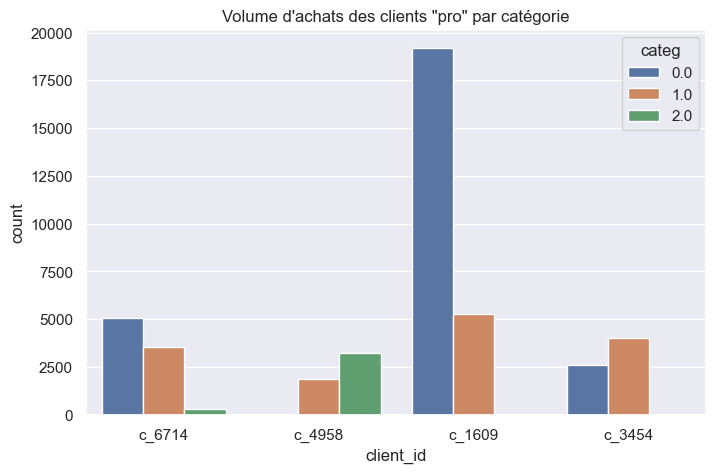

In [594]:
plt.figure(figsize=(8,5))
sns.countplot(data=df_pro, x='client_id', hue='categ')
plt.title('Volume d\'achats des clients "pro" par catégorie')
plt.show()

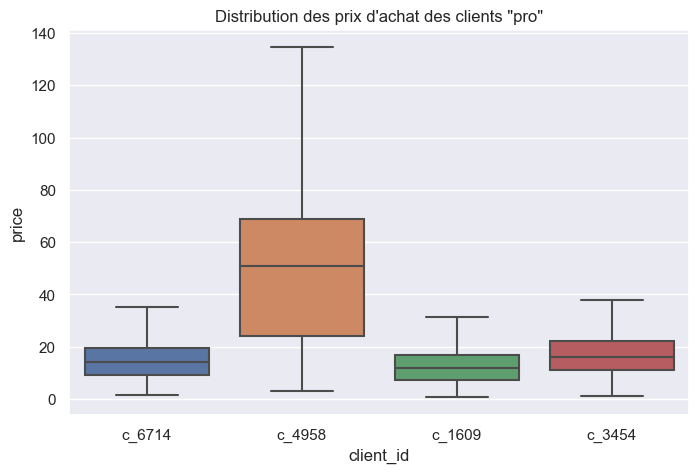

In [595]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_pro, y='price', x='client_id', showfliers=False)
plt.title('Distribution des prix d\'achat des clients "pro"')
plt.show()

In [596]:
# suppression des clients pro du Df
print(df.shape)
df.drop(df[(df["client_id"].isin(id_best))].index, inplace=True)
df.shape
#####################
#df = df.to_csv(r"./donnees/df.csv", index=False)

(657726, 14)


(612626, 14)

## Differences des achats entre hommes et femmes


### Repartition des genres au sein de la clientele

sex
f    4490
m    4131
Name: client_id, dtype: int64


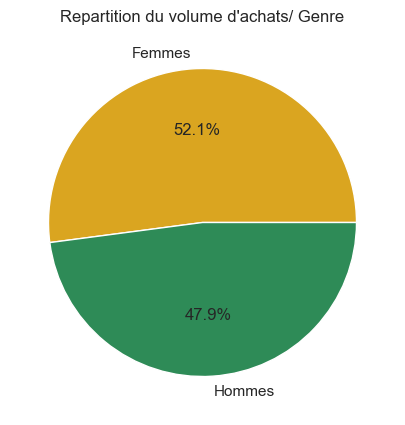

In [597]:
# Proportion d'hommes et de femmes au sein de la clientele
df_prop =customers.groupby(['sex'])['client_id'].count()
print(df_prop)

data= df_prop
labels=["Femmes", "Hommes"]
color=['goldenrod','seagreen']
plt.pie(data, labels=labels ,colors=color, autopct='%0.1f%%')
plt.title("Repartition du volume d'achats/ Genre")
plt.show()


### Repartition du chiffre d'affaires par genre

sex
f    5555669.85
m    5122347.89
Name: price, dtype: float64

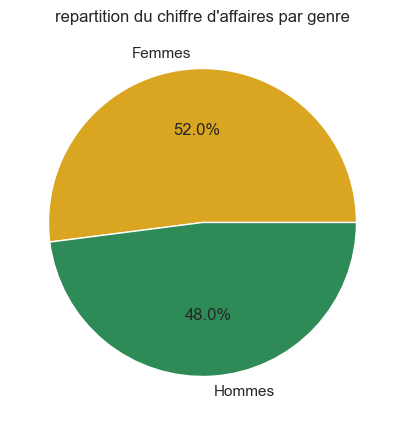

In [598]:
df_prop =df.groupby(['sex'])['price'].sum()
display(df_prop)

data= df_prop
labels=["Femmes", "Hommes"]
plt.pie(data, labels=labels ,colors=color,autopct='%0.1f%%')
plt.title("repartition du chiffre d'affaires par genre")
plt.show()

### Repartition des achats par genre et par categorie

   categ sex  session_id
0    0.0   f      192025
1    0.0   m      178044
2    1.0   f      110550
3    1.0   m      100227
4    2.0   f       16429
5    2.0   m       15351


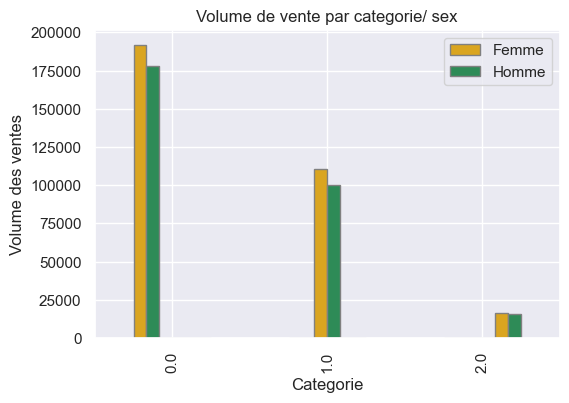

In [599]:
#nombre de ventes par categorie et par genre
df_prop_HF =df.groupby(['id_prod', 'categ','sex'],as_index=False)['session_id'].count()

df_HF_categ = df_prop_HF.groupby(['categ', 'sex'], as_index=False)['session_id'].sum()
print(df_HF_categ)

Ag_df = pd.pivot_table(df_HF_categ, index=['categ'],columns=["categ", 'sex'])
Ag_df.columns=['cat0_F', 'cat0_m','cat1_F', 'cat1_m','cat2_F', 'cat2_m']

Ag_df[['cat0_F', 'cat0_m','cat1_F', 'cat1_m','cat2_F', 'cat2_m']].plot.bar(figsize=(6,4),color=color,edgecolor = "grey")
plt.ylabel('Volume des ventes')
plt.xlabel('Categorie')
plt.title("Volume de vente par categorie/ sex")

plt.gca().legend(('Femme','Homme'))
plt.show()



Table de contingence :
categ     0.0     1.0    2.0
sex                         
f      192025  110550  16429
m      178044  100227  15351
chi2 =  18.75788251563821
soit une p-value de 0.0000844846
Le V de Cramer vaux: 0.005533427110161377


[]

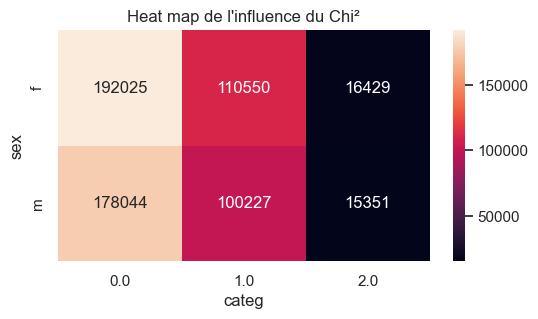

In [600]:

# Chi2 recherche d'une correlation entre le genre (qualitatif) et la categorie (qualitative)
plt.figure(figsize=(6,3))

# creation de la table de contingence
crosstab = pd.crosstab(df['sex'], df['categ'], margins=False)
print('Table de contingence :')
print(crosstab)

# Calcul du chi2
cs_chi2, cs_p_value, cs_dof, cs_exp = st.chi2_contingency(crosstab)
print('chi2 = ', cs_chi2)
print(f"soit une p-value de %.10f" % (cs_p_value))

#Calcul V de cramer
n_cs = len(df)
minDim_cs = min(crosstab.shape)-1
V_cs = np.sqrt((cs_chi2/n_cs) / minDim_cs)

print("Le V de Cramer vaux:", V_cs)

#Heat map
sns.heatmap(crosstab,annot=crosstab,fmt='d')
plt.title("Heat map de l'influence du Chi²")
plt.plot()






La P-Value du chi2 est tres inferieure a 0.05 on peut donc en deduire qu'il n'y a pas de correlation entre les variables genre et categorie. 
Ce qui est confirme par le calcul du V de Cramer ou 0 représente une indépendance parfaite et 1 une dependance parfaite entre les variables.

## Recherche de lien de correlation 

### Distribution de la variable age

age = Variable quantitative discrete  

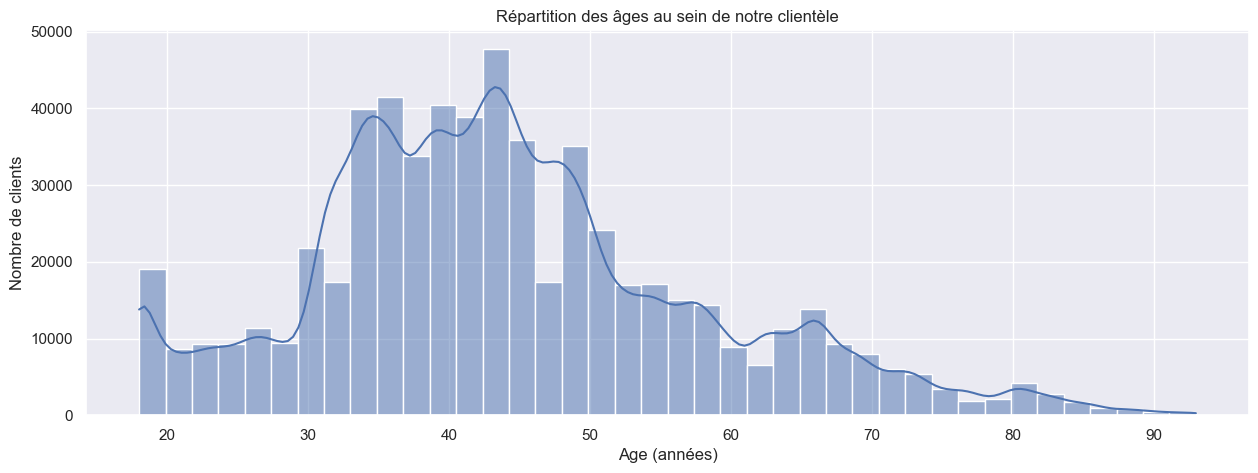

In [601]:
# Repartition des ages parmis nos clients:
sns.histplot(data=df["age"],
             bins=40,
             kde=True)
plt.title("Répartition des âges au sein de notre clientèle")
plt.ylabel("Nombre de clients")
plt.xlabel("Age (années)")
plt.show()

In [602]:
# Test de normalite de la repartition des ages
# test d'Anderson Darling
print(st.anderson(new_customers["age"], dist="norm"))


AndersonResult(statistic=54.304839298933075, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


H0 = Distribution normale  
Le resultat statistique du test = 54  
54 > 1.091  
On peut donc rejeter H0 qui dit que la distribution est normale.


### Age moyen des clients par categorie

In [603]:
df_age_categ = df.groupby(["categ"])["age"].mean()
age_moyen= new_customers["age"].mean()
print("L'age moyen des acheteurs par categorie:",df_age_categ, round(age_moyen,1))

#lien corelation


L'age moyen des acheteurs par categorie: categ
0.0    43.799700
1.0    47.802379
2.0    25.960824
Name: age, dtype: float64 43.7


### Chiffre d'affaires par tranche d'age

chiffre d'affaires par age 
 age
18    591414.23
19    172831.75
20    178797.16
21    174347.66
22    160575.19
Name: price, dtype: float64 

anderson= AndersonResult(statistic=1.1796484849823372, critical_values=array([0.549, 0.626, 0.751, 0.876, 1.042]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ])) 

Corrélation de Spearman:-0.87404 
 pvalue=0.000000000000000000000000666876


Text(0.5, 1.0, "Chiffre d'affaires par âge")

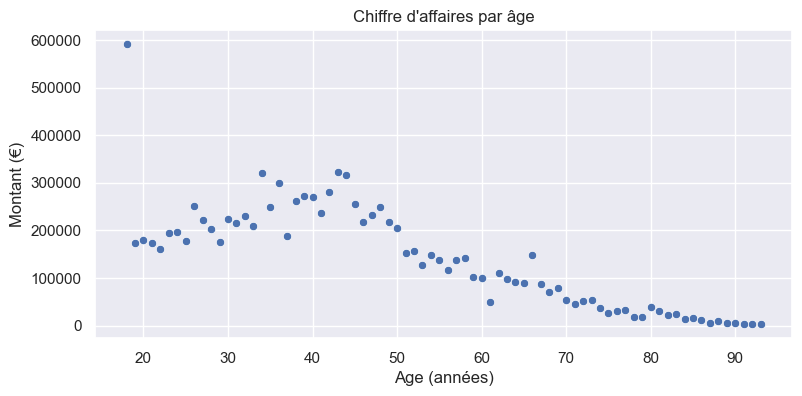

In [604]:
# Lien entre l'age et le montant des achats:
age = df.groupby(["age"])["client_id"].count()
tot_achats_age = df.groupby(["age"])["price"].sum()
print("chiffre d'affaires par age \n",tot_achats_age[:5],'\n')


print("anderson=",st.anderson(tot_achats_age.values, dist="norm"),"\n")
# Correlation entre l'age et le montant total des achats:
correlation, pvalue = st.spearmanr(tot_achats_age.index, tot_achats_age.values)
#print("Corrélation de Speraman:", st.spearmanr(tot_achats_age.index, tot_achats_age.values))
print("Corrélation de Spearman:%.5f \n pvalue=%.30f" %(correlation, pvalue) )


# Graphique:
plt.figure(figsize=(9,4))
sns.scatterplot(data= tot_achats_age)
plt.ylabel("Montant (€)")
plt.xlabel("Age (années)")
plt.title("Chiffre d'affaires par âge")



La variable age n'ayant pas une distribution normale, on utilise donc le test de correlation de Spearman, qui est un test non parametrique de rang.  
Grace aux resultats de ce test on peut rejeter H0.  
Il n'y a donc pas de correlation entre l'age et le Chiffre d'affaires

### Montant moyen du panier par age

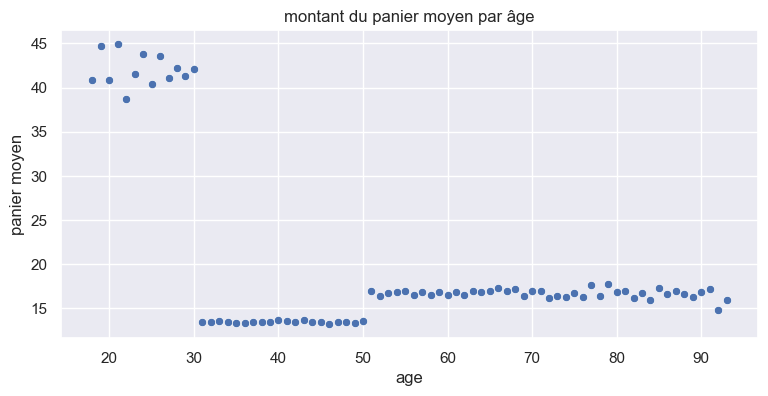

In [605]:
#Prix moyen du panier par age
panier_moyen = df.groupby(["client_id", "age"],as_index=False)["price"].mean()
panier_moyen= panier_moyen.groupby(["age"]).mean()
panier_moyen.rename(columns={"price": "panier moyen", "age":"age"}, inplace=True)
panier_moyen = round(panier_moyen["panier moyen"], 1)

#Graphique
plt.figure(figsize=(9,4))
sns.scatterplot(data=panier_moyen)
plt.title('montant du panier moyen par âge')

plt.show()







### Taille du panier moyen par age

AndersonResult(statistic=7.211543131286874, critical_values=array([0.549, 0.626, 0.751, 0.876, 1.042]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
correlation= SpearmanrResult(correlation=-0.6253725222146275, pvalue=1.5476388067406397e-09)


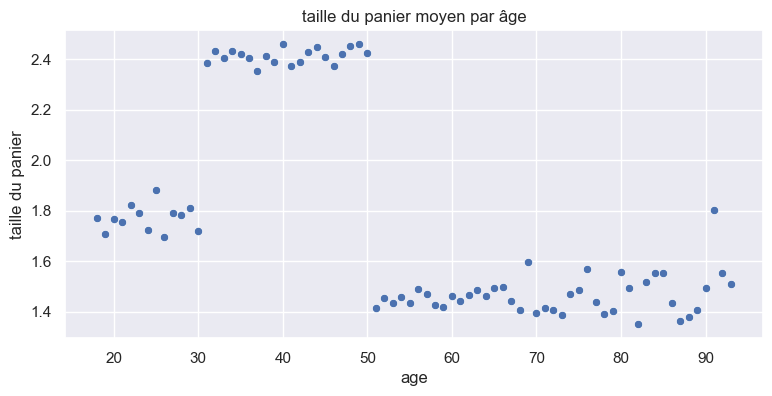

In [606]:
age_taille_panier = df.groupby(["age","session_id"], as_index=False)["session_id"].count()
age_taille_panier = age_taille_panier.groupby(["age"], as_index=False)["session_id"].mean()
#print(age_taille_panier)

print(st.anderson(age_taille_panier['session_id'], dist="norm"))

print("correlation=", st.spearmanr(age_taille_panier["age"],age_taille_panier["session_id"]))

plt.figure(figsize=(9,4))
sns.scatterplot(
    data=age_taille_panier, x="age", y ="session_id")


plt.title('taille du panier moyen par âge')
plt.ylabel("taille du panier")
plt.show()






### Lien entre l'age et la categorie.

KruskalResult(statistic=69911.21351199699, pvalue=0.0)


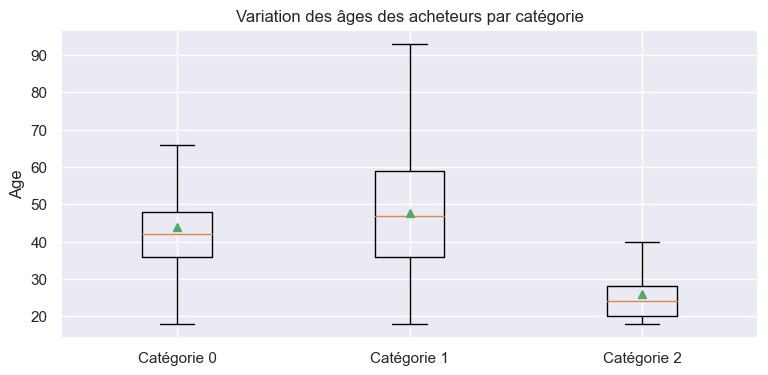

210777


In [607]:
# Categories les plus achetees par age:
categ = df["categ"].unique()
#display(categ)
categ_age = {categ: df.loc[df["categ"]==categ, "age"] for categ in categ}
print(st.kruskal(categ_age[0], categ_age[1], categ_age[2]))

# Graphique:
plt.figure(figsize=(9,4))
plt.boxplot([categ_age[0],categ_age[1],categ_age[2]],labels=["Catégorie 0", "Catégorie 1", "Catégorie 2"],showmeans=True, showfliers=False)
plt.ylabel("Age")
plt.title("Variation des âges des acheteurs par catégorie")
plt.show()
print(len(categ_age[1]))


Comme il s'agit d'une méthode non paramétrique, le test de Kruskal-Wallis ne suppose pas une distribution normale des résidus,
La p value etant < 0,01 on rejette H0 selon laquelle il n'y aurait pas de différences entre l'âge median d'achat et la catégorie.
L'hypothèse alternative est qu'au moins une médiane de la population d'un groupe est différente de la médiane de la population d'au moins un autre groupe.

### Frequence mensuelle d'achat en fonction de l'age

freq age    age  session_id
0   18        1.45
1   19        1.41
2   20        1.40
3   21        1.45
4   22        1.42
Corrélation de Spearaman: SpearmanrResult(correlation=-0.007983595352016403, pvalue=0.9454298440190254)


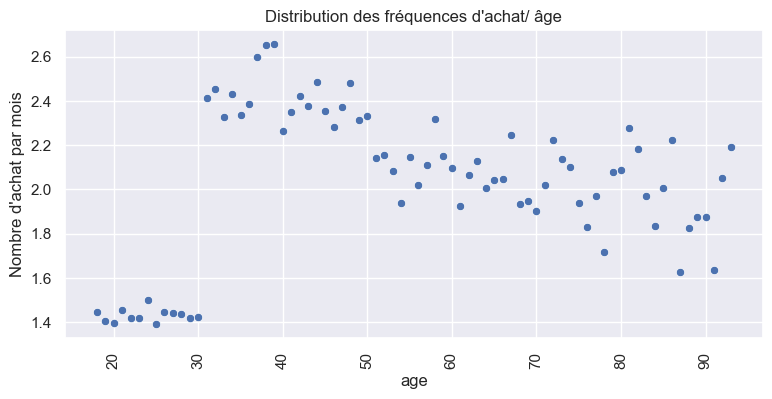

In [608]:
#Frequence mensuelle d'achat en fonction de l'age

freq_mensu= df.groupby(["client_id", "annee", "mois"])["session_id"].nunique().groupby(["client_id"]).mean().reset_index()
freq_mensu = pd.merge(freq_mensu,new_customers, on="client_id",how="left")
freq_mensu = freq_mensu.dropna() 
freq_age = freq_mensu.groupby(["age"], as_index=False)["session_id"].mean()
print("freq age",round(freq_age,2)[:5])
df_freq = pd.DataFrame(freq_age)

#Recherche correlation entre frequence d'achat et age
print("Corrélation de Spearaman:", st.spearmanr(freq_age['age'], freq_age["session_id"]))
# graphique

plt.figure(figsize=(9,4))
sns.scatterplot(data=df_freq, x="age", y="session_id")
#plt.plot(data=freq_age, y="session_id")

plt.xticks(rotation=90)
plt.ylabel("Nombre d'achat par mois")
plt.title('Distribution des fréquences d\'achat/ âge')

plt.show()





# Conclusions:  
- suite a un problème d’acquisition des données en octobre 2021, toutes les données concernant ce mois n'ont pas etees prises en compte.  
- Nous enregistrons un chiffre d'affaires total de 11 535 067€ (le mois d’octobre 2021 est decompté du chiffre d’affaires).  
- Quatre clients représentent env 7,5% du chiffre d’affaires à eux seuls. Il s’agit probablement de professionnels.  
- De manière générale le genre des clients n’a pas d’incidence sur leur comportement d’achat.  
- L’age en revanche peut nous permettre d’observer certaines tendances:
	- Les moins de 30 ans achetent en plus petite quantite et de maniere moins frequente, mais effectuent plus d’achats dans la categorie 2 dont les produits coutent plus cher que les autres categories.  
	- Les 30-50 ans dépensent un petit peu plus en moyenne car ils achètent en plus grande quantite et de maniere plus frequente, par contre les references qu’ils achetent coutent moins cher.  
	- Les plus de 50  ans achètent en plus petite quantité, par contre leur frequence d’achat est relativement elevée, cependant, tout comme les 30-50 ans, ils achètent essentiellement des références dans les categories 0 et 1 dont les prix par produit sont peu elevés.  




